<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Slave_Voyages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/leonarddocchagas/data_science/blob/master/projetos/slavevoyages/SlaveVoyages.png?raw=true" />

**Comércio Transatlântico de Escravos**

O site Slave Voyages, documentou e disponibilizou de forma digital, arquivos sobre esse triste período da história mundial e, em especial, para o Brasil, onde o tráfico negreiro perdurou até a criação da Lei Áurea de 1888. Existem registros de mercado de escravos, desde 1444 em Portugal. E existem registros bem antigos dessa prática, ainda em impérimos como o dos Romanos, Gregos, Árabes.  

### Sobre os dados

  * Explorar a disperssão de Africanos escravizados pelo Atlântico
    * https://www.slavevoyages.org/
    * Dataset: https://www.slavevoyages.org/voyage/database 

## Obtenção e transformação dos dados

**Carrega e verifica dataset**

In [1]:
# importando bibliotecas
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando dados
dataset = "https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/slavevoyages/data_SlaveVoyages.csv"
df_raw = pd.read_csv(dataset)

# entredas e variáveis
print('Entradas: {}' .format(df_raw.shape[0]))
print('Variáveis: {}' .format(df_raw.shape[1]))

Entradas: 36110
Variáveis: 8


In [3]:
# carregando dataset
df_raw.head()

,Identidade da viagem,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Year of arrival at port of disembarkation,Slaves arrived at 1st port,Captain's name
0,10354,Wakende Kraan,Hellevoetsluis,Elmina,Curacao,1706,177.0,"Hoeven, Jan van der<br/> Wenman, Roelof"
1,10355,Wapen van Amsterdam,NaN,Ardra,NaN,1685,NaN,NaN
2,10356,Wapen van Amsterdam,Texel,"Gold Coast, port unspecified",Curacao,1688,NaN,"Scheij, Pieter"
3,10357,Wapen van Holland (a) Hollandia,Hellevoetsluis,Whydah,Curacao,1701,459.0,"Stoop, Pieter<br/> Crans, Pieter"
4,10358,Wapen van Holland (a) Hollandia,Hellevoetsluis,Whydah,Suriname,1702,386.0,"Crans, Pieter"


In [4]:
# verificando os tipos de dados
df_raw.dtypes

Identidade da viagem                                                                   int64
Vessel name                                                                           object
Voyage itinerary imputed port where began (ptdepimp) place                            object
Voyage itinerary imputed principal place of slave purchase (mjbyptimp)                object
Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place     object
Year of arrival at port of disembarkation                                              int64
Slaves arrived at 1st port                                                           float64
Captain's name                                                                        object
dtype: object

In [5]:
# dados ausentes
df_raw.isnull().sum() / df_raw.shape[0] 

Identidade da viagem                                                                 0.000000
Vessel name                                                                          0.000083
Voyage itinerary imputed port where began (ptdepimp) place                           0.123705
Voyage itinerary imputed principal place of slave purchase (mjbyptimp)               0.046774
Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place    0.118056
Year of arrival at port of disembarkation                                            0.000000
Slaves arrived at 1st port                                                           0.491387
Captain's name                                                                       0.112323
dtype: float64

Em nosso dataset, identificamos que na métrica `Slaves arrived at 1st port`, que contém a quantidade de escravos, está com quase 50% dos dados ausentes. Isso dificulta nossa análise, uma vez que, nessa situação, será necessário excluir as entradas sem valor, que seria uma grande perda ou preencher com a média, médiana ou outros técnicas. 

**Transformação**

Para falicitar nas análises, vamos diminuir o tamanho do nome das columas e também, trazer para o português. Vamos criar um novo Dataset e manter o original, que servirá para consultas futuras.

In [6]:
# Dataset redução e tradução de colunas
df = df_raw.rename(columns={'Vessel name': 'Nome Embarcação', 
                            'Voyage itinerary imputed port where began (ptdepimp) place':'Porto onde viagem começou',
                            'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ':'Local de aquisição',
                            'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place': 'Local Desembarque',
                            'Year of arrival at port of disembarkation': 'Ano Chegada',
                            'Slaves arrived at 1st port':'Qtde.',
                            "Captain's name":'Nome Capitão'})


# carregando dataset
df.head()

,Identidade da viagem,Nome Embarcação,Porto onde viagem começou,Local de aquisição,Local Desembarque,Ano Chegada,Qtde.,Nome Capitão
0,10354,Wakende Kraan,Hellevoetsluis,Elmina,Curacao,1706,177.0,"Hoeven, Jan van der<br/> Wenman, Roelof"
1,10355,Wapen van Amsterdam,NaN,Ardra,NaN,1685,NaN,NaN
2,10356,Wapen van Amsterdam,Texel,"Gold Coast, port unspecified",Curacao,1688,NaN,"Scheij, Pieter"
3,10357,Wapen van Holland (a) Hollandia,Hellevoetsluis,Whydah,Curacao,1701,459.0,"Stoop, Pieter<br/> Crans, Pieter"
4,10358,Wapen van Holland (a) Hollandia,Hellevoetsluis,Whydah,Suriname,1702,386.0,"Crans, Pieter"


Na exibição das 5 primeiras linhas, em algumas colunas `Local de aquisição`, `Nome Capitão`, conteúdo como: (', port unspecified') que polui a visuazliação e não contribui em nada. Vamos limpar. 

In [7]:
# retirando 'lixo' das entradas
df['Local Desembarque'] = df['Local Desembarque'].apply(lambda x: str(x).replace(', port unspecified', ''))
df['Local de aquisição'] = df['Local de aquisição'].apply(lambda x: str(x).replace(', port unspecified', ''))
df['Porto onde viagem começou'] = df['Porto onde viagem começou'].apply(lambda x: str(x).replace(', port unspecified', ''))

Para dados ausentes, vamos criar mais dois novos datasets e aplicar diferentes técnicas. No `df_clean`, vamos remover os ausentes. No `df_fill_median`, vamos preencher com a mediana. Assim, ao final, podemos comparar os resultados.

In [8]:
# criando dois novos datasets
df_clean = df.copy()
df_fill_median = df.copy()

In [9]:
# verificando dados ausentes
df.isnull().sum() / df.shape[0]

Identidade da viagem         0.000000
Nome Embarcação              0.000083
Porto onde viagem começou    0.000000
Local de aquisição           0.000000
Local Desembarque            0.000000
Ano Chegada                  0.000000
Qtde.                        0.491387
Nome Capitão                 0.112323
dtype: float64

In [10]:
# Excluir dados ausentes
df_clean = df_clean.dropna(subset=['Qtde.'], axis=0)

# exibi primeiras linhas
df_clean.isnull().sum()

Identidade da viagem            0
Nome Embarcação                 0
Porto onde viagem começou       0
Local de aquisição              0
Local Desembarque               0
Ano Chegada                     0
Qtde.                           0
Nome Capitão                 1626
dtype: int64

In [11]:
# preencher dados ausentes com a mediana
rd_median = df_fill_median['Qtde.'].median()
df_fill_median = df_fill_median.fillna({'Qtde.': rd_median})

# exibi primeiras linhas
df_fill_median.isnull().sum()

Identidade da viagem            0
Nome Embarcação                 3
Porto onde viagem começou       0
Local de aquisição              0
Local Desembarque               0
Ano Chegada                     0
Qtde.                           0
Nome Capitão                 4056
dtype: int64

In [12]:
# Verificando tipo de dados
df_fill_median.dtypes

Identidade da viagem           int64
Nome Embarcação               object
Porto onde viagem começou     object
Local de aquisição            object
Local Desembarque             object
Ano Chegada                    int64
Qtde.                        float64
Nome Capitão                  object
dtype: object

In [13]:
# converter tipo object to category
df_fill_median['Identidade da viagem'] = pd.Categorical(df_fill_median['Identidade da viagem'])
df_fill_median['Nome Embarcação'] = pd.Categorical(df_fill_median['Nome Embarcação'])
df_fill_median['Porto onde viagem começou'] = pd.Categorical(df_fill_median['Porto onde viagem começou'])
df_fill_median['Local de aquisição'] = pd.Categorical(df_fill_median['Local de aquisição'])
df_fill_median['Local Desembarque'] = pd.Categorical(df_fill_median['Local Desembarque'])
df_fill_median['Nome Capitão'] = pd.Categorical(df_fill_median['Nome Capitão'])
df_fill_median['Qtde.'] = df_fill_median['Qtde.'].astype('int64')

In [14]:
# verificando conversão
df_fill_median.dtypes

Identidade da viagem         category
Nome Embarcação              category
Porto onde viagem começou    category
Local de aquisição           category
Local Desembarque            category
Ano Chegada                     int64
Qtde.                           int64
Nome Capitão                 category
dtype: object

## Visualização

In [15]:
# top 10 dos estados que mais receberam escravos
df_fill_median['Local Desembarque'].value_counts()[:10]

nan               4263
Bahia             4223
Rio de Janeiro    2887
Barbados          2038
Jamaica           1715
Kingston          1622
Pernambuco        1335
Havana            1322
Cap Francais      1127
Charleston         811
Name: Local Desembarque, dtype: int64

Vamos criar um novo dataset e vou chamar de: `df_pe`, agora com dados onde o `Local Desembarque` tenha sido em Pernambuco, que é o estado onde moro. Assim, vamos ter um comparatido em relação aos demais locais.

In [16]:
# dataset Pernambuco
df_pe = df_fill_median[df_fill_median['Local Desembarque'] == 'Pernambuco']
df_pe.head()

,Identidade da viagem,Nome Embarcação,Porto onde viagem começou,Local de aquisição,Local Desembarque,Ano Chegada,Qtde.,Nome Capitão
700,11215,NS da Conceição,Pernambuco,Luanda,Pernambuco,1651,380,NaN
701,11216,NS da Ajuda,Pernambuco,Luanda,Pernambuco,1651,400,NaN
703,11218,,Pernambuco,West Central Africa and St. Helena,Pernambuco,1649,290,NaN
707,11222,,Pernambuco,Luanda,Pernambuco,1633,300,NaN
708,11224,,Pernambuco,Luanda,Pernambuco,1636,390,NaN


Vamos utilizar o histograma, onde será possível analisar a distribuição da quantidade, baseado no `Ano Chegada`, comparando dos demais com Pernambuco. 

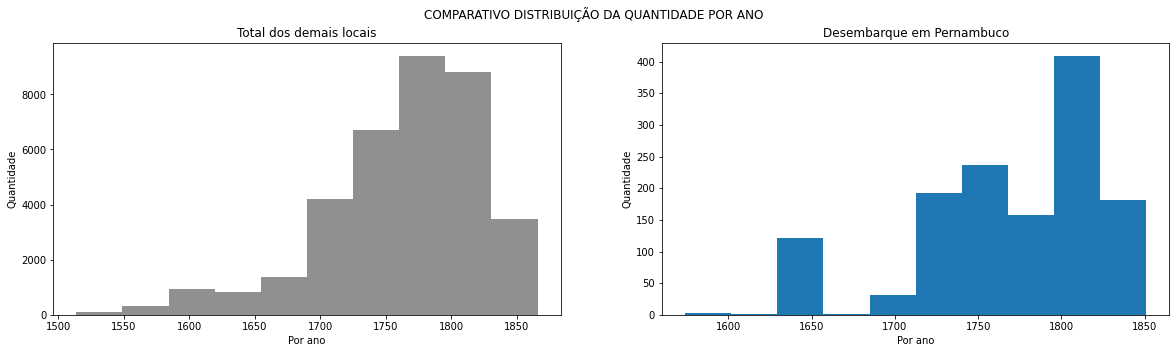

In [17]:
# comparativo entre Pernambuco e os demais
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('COMPARATIVO DISTRIBUIÇÃO DA QUANTIDADE POR ANO')

# demais locais
ax.set_title('Total dos demais locais')
ax.hist(df_fill_median['Ano Chegada'], color='#909090')
ax.set_xlabel('Por ano')
ax.set_ylabel('Quantidade')

# pernambuco
ax1.hist(df_pe['Ano Chegada'])
ax1.set_title('Desembarque em Pernambuco')
ax1.set_xlabel('Por ano')
ax1.set_ylabel('Quantidade')

plt.show()

Com os dados distribuídos, é possível perceber que mais ou menos entre 1630 e 1660 em Pernanbuco, houve uma alta, possívelmente causado pela invasão Holandesa ao estado. Depois baixou e voltou a subir por volta de 1700. Já nos demais locais, a crescente se manteve ao passar do tempo, diminuindo apenas por volta de 1850.

In [18]:
# TOP10 maiores locais de aquisição
df_fill_median['Local de aquisição'].value_counts()[:10]

Africa.                               7910
Luanda                                3623
Costa da Mina                         2129
West Central Africa and St. Helena    1833
nan                                   1689
Bonny                                 1228
Gold Coast                            1138
Whydah                                1112
Calabar                                955
Benguela                               930
Name: Local de aquisição, dtype: int64

In [19]:
# TOP10 maiores locais de desembarque
df_fill_median['Local Desembarque'].value_counts()[:10]

nan               4263
Bahia             4223
Rio de Janeiro    2887
Barbados          2038
Jamaica           1715
Kingston          1622
Pernambuco        1335
Havana            1322
Cap Francais      1127
Charleston         811
Name: Local Desembarque, dtype: int64

In [20]:
# TOP10 maiores locais de desembarque
df_fill_median['Nome Capitão'].value_counts()[:10]

Smith, John                 39
Williams, William           27
Simmons, John               22
Garcia, Francisco Correa    22
Brown, William              22
Molyneux, Thomas            20
Silva, José Leite da        20
Kendall, John               20
Brown, John                 19
Silva, José Gonçalves da    18
Name: Nome Capitão, dtype: int64

##Conclusão

Belo trabalho realizado pelo grupo **Slave Voyages**, trabalho sério de levantamento de dados. Infelizmente, muitos foram foram perdidos, apagados para que não fosse possível identificar o real número pessoas negras traficadas. Mas deu para ter uma noção do quanto sofrimento provocado por humanos. 